In [2]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import pandas as pd

In [174]:

nb_of_clusters = 5
dataset, _ = datasets.make_blobs(n_samples=500, centers=nb_of_clusters, n_features=2)  # n_features : nombre de dimensions


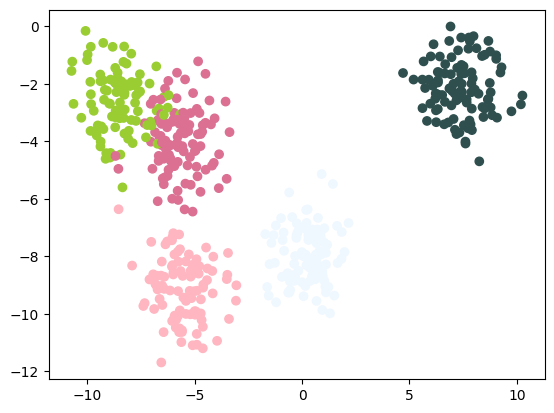

In [175]:
def visualize_clustersV1(dataset, centers=None, title=None):

    colors = list(mcolors.CSS4_COLORS.keys())
    plt.scatter(dataset[:, 0], dataset[:, 1], c=_, cmap=mcolors.ListedColormap(colors))

    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='red')
    plt.show()


visualize_clustersV1(dataset)

In [121]:
def visualize_clusters(dataset, centers=None, title=None):
    colors = list(mcolors.CSS4_COLORS.keys())
    if dataset.shape[1] == 2:
        plt.scatter(dataset[:, 0], dataset[:, 1], c=_, cmap=mcolors.ListedColormap(colors))
    elif dataset.shape[1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c=_, cmap=mcolors.ListedColormap(colors))
    else:
        raise ValueError("Visualization not implemented for more than 3 dimensions")

    if centers is not None:
        if centers.shape[1] == 2:
            plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)  # Use 'x' marker with larger size
        elif centers.shape[1] == 3:
            ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=100)
        else:
            raise ValueError("Visualization not implemented for more than 3 dimensions")

    plt.show()

In [88]:

def sse_distance(a, b):
    return np.sum((a-b)**2)

def find_closest_center(centers, data):
    distances = []
    for center in centers:
        distances.append(sse_distance(center, data))
    return np.argmin(distances)

def compute_clusters(centers, data):
    clusters = []
    for point in data:
        clusters.append(find_closest_center(centers, point))
    return clusters

def sse_error(centers, data):
    clusters = compute_clusters(centers, data)
    error = 0
    for i in range(len(clusters)):
        error += sse_distance(data[i], centers[clusters[i]])
    return error


In [97]:
##############################
#
# KMEANS ++
#
##############################
def initialize_centers2(data, k):
    centers = []
    # Sélectionner aléatoirement le premier centre parmi les points de données
    centers.append(data[np.random.randint(0, len(data))])

    for _ in range(1, k):
        distances = []
        for point in data:
            # Pour chaque point, calculer la distance au centre le plus proche déjà choisi
            min_distance = min(sse_distance(point, c) for c in centers)
            distances.append(min_distance)

        # Probabilité proportionnelle à la distance au centre le plus proche déjà choisi
        probabilities = np.array(distances) / sum(distances)
        
        # Choisir le nouveau centre avec une probabilité proportionnelle à la distance au centre déjà choisi
        new_center_index = np.random.choice(len(data), p=probabilities)
        centers.append(data[new_center_index])

    return np.array(centers)



In [122]:
def initialize_centers(data, k):
    centers = []
    for i in range(k):
        centers.append(data[np.random.randint(0, len(data))])
    return centers

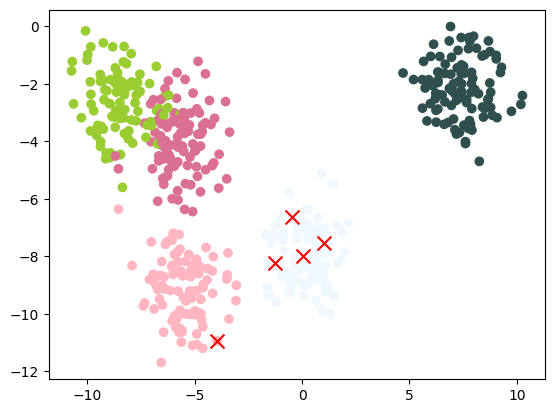

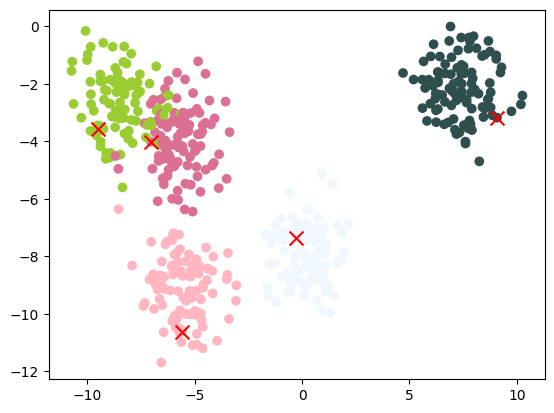

In [176]:

visualize_clusters(dataset, np.array(initialize_centers(dataset, nb_of_clusters))) # Initialisation aléatoire
visualize_clusters  (dataset, np.array(initialize_centers2(dataset, nb_of_clusters))) # KMEANS ++

Iteration 1, SSE = 8686.439752109389


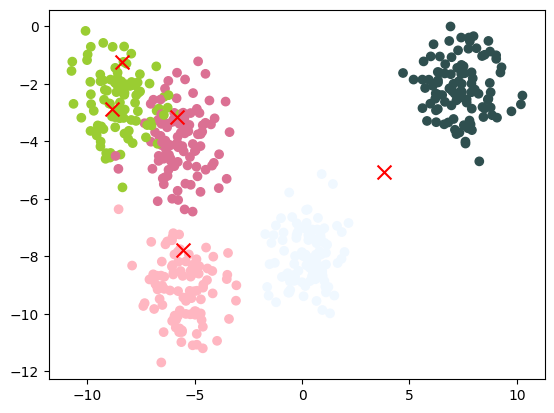

Iteration 2, SSE = 5134.080590300628


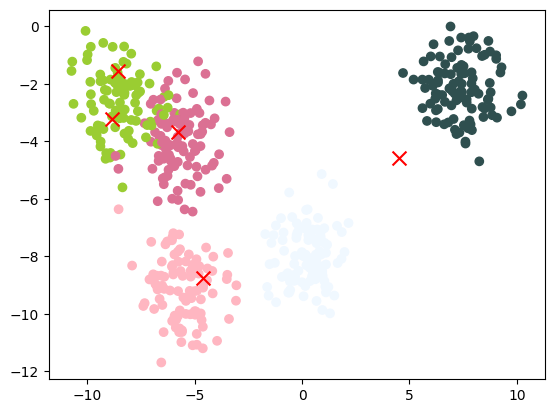

Iteration 3, SSE = 4397.806165244115


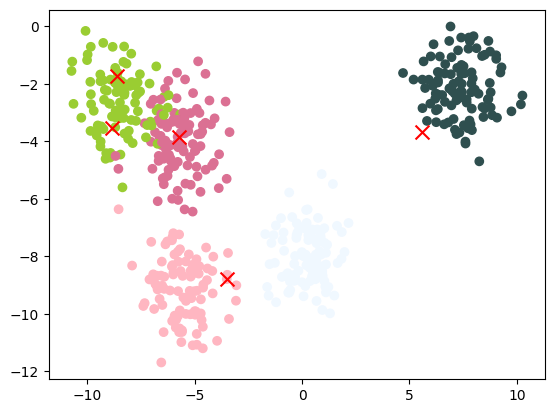

Iteration 4, SSE = 3260.363089562719


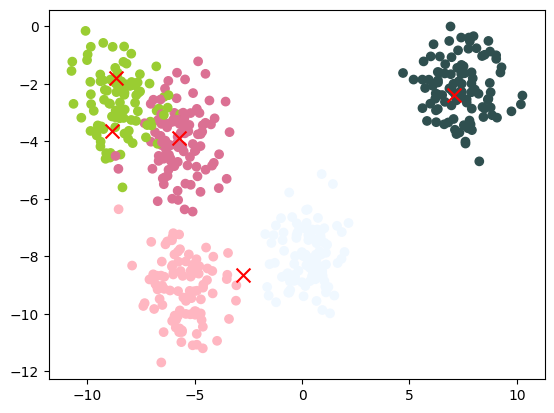

Iteration 5, SSE = 2591.111463036462


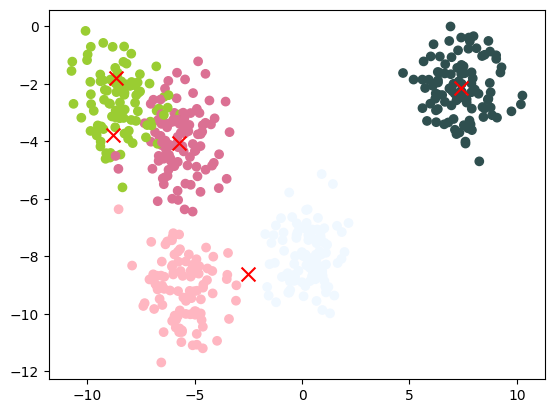

Iteration 6, SSE = 2553.002606718248


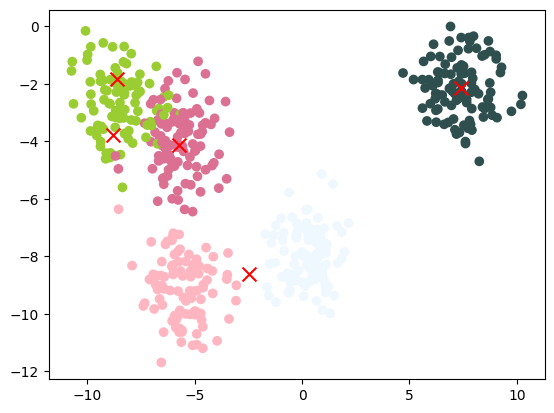

Iteration 7, SSE = 2551.4762933301963


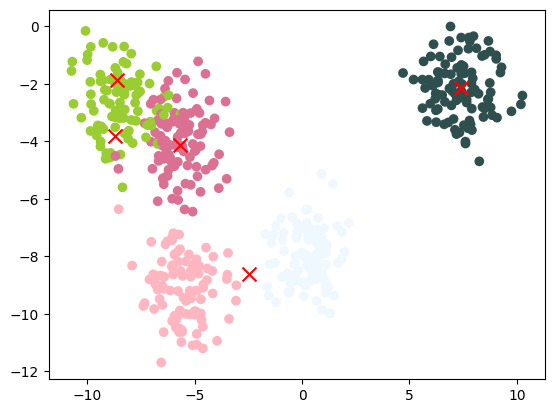

Convergence atteinte après 7 itérations.


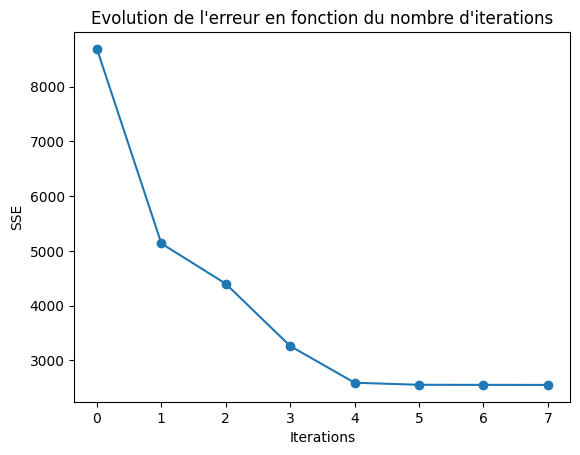

In [182]:
def kmeans(data, k, num_it ,centers=centers):
    centers_history = []
    sse_history = []
    tolerance=1

    # Initialisation des centres
    centers = initialize_centers(data, k)
    #centers = initialize_centers2(data, k) # pour kmeans ++

    

    for i in range(num_it):
        centers_history.append(np.array(centers))
        
        # Attribution des clusters
        clusters = compute_clusters(centers, data)
        
        # Calcul du SSE
        sse = sse_error(centers, data)
        sse_history.append(sse)
        
        # Mise à jour des centres
        new_centers = []
        for cluster_id in range(k):
            cluster_points = np.array([data[j] for j in range(len(data)) if clusters[j] == cluster_id])
            new_centers.append(np.mean(cluster_points, axis=0))
        # Si les centres n'ont pas changé, on a atteint la convergence
        if i > 0 and abs(sse_history[i-1] - sse) < tolerance:
            print(f"Convergence atteinte après {i} itérations.")
            break
        centers = new_centers
        print(f"Iteration {i+1}, SSE = {sse}")
        visualize_clustersDim(data, np.array(centers))


    # Dernière mise à jour des centres et SSE
    clusters = compute_clusters(centers, data)
    sse = sse_error(centers, data)
    centers_history.append(np.array(centers))
    sse_history.append(sse)
    

    # Affichage de l'évolution de l'erreur en fonction du nombre d'itérations
    plt.plot(range(i+1), sse_history[:-1], marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('SSE')
    plt.title('Evolution de l\'erreur en fonction du nombre d\'iterations')
    plt.show()

    # Retourne l'historique des centres et l'historique de SSE
    history = {'centers_history': centers_history, 'sse_history': sse_history}
    return history
h= kmeans(dataset,nb_of_clusters, 20)

Iteration 1, SSE=649.2607142879097
Iteration 2, SSE=211.4226671334053
Iteration 3, SSE=138.3719731294345
Iteration 4, SSE=180.31882143397075
Iteration 5, SSE=162.8718795783375
Iteration 6, SSE=130.4328102670108
Iteration 7, SSE=109.7583818114617
Iteration 8, SSE=112.15954193811824
Iteration 9, SSE=93.24733364813747
Iteration 10, SSE=126.4650740481991
Iteration 11, SSE=109.08973816616023
Convergence atteinte à l'itération 12


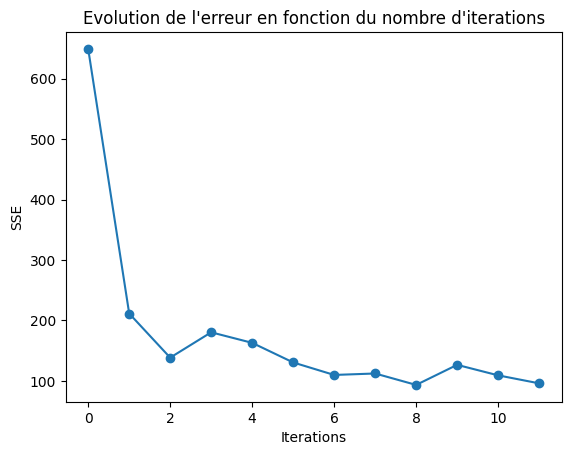

In [181]:
def kmeansb(data, k, num_it, batch_size=32):
    tolerance=1
    centers_history = []
    sse_history = []

    # Initialisation des centres
    centers = initialize_centers(data, k)

    for i in range(num_it):
        centers_history.append(np.array(centers))
        
        # Randomly select a batch of data points
        batch_indices = np.random.choice(len(data), size=batch_size, replace=False)
        batch_data = data[batch_indices]
        
        # Attribution des clusters
        clusters = compute_clusters(centers, batch_data)
        
        # Calcul du SSE
        sse = sse_error(centers, batch_data)
        sse_history.append(sse)
        
        # Mise à jour des centres
        new_centers = []
        for cluster_id in range(k):
            cluster_points = np.array([batch_data[j] for j in range(len(batch_data)) if clusters[j] == cluster_id])
            if len(cluster_points) > 0:
                new_centers.append(np.mean(cluster_points, axis=0))
            else:
                new_centers.append(centers[cluster_id])  # If a cluster is empty, keep the center unchanged
        
        # Check for convergence using a tolerance threshold
        if np.linalg.norm(np.array(new_centers) - np.array(centers)) < tolerance:
            print(f"Convergence atteinte à l'itération {i+1}")
            break

        centers = new_centers
        print(f"Iteration {i+1}, SSE={sse}")
        
        # visualize_clusters(data, np.array(centers))  # You can implement this function for visualization if needed

    # Dernière mise à jour des centres et SSE
    clusters = compute_clusters(centers, data)
    sse = sse_error(centers, data)
    centers_history.append(np.array(centers))
    sse_history.append(sse)

    # Affichage de l'évolution de l'erreur en fonction du nombre d'itérations sauf la dernière
    plt.plot(range(i+1), sse_history[:-1], marker='o')

    plt.xlabel('Iterations')
    plt.ylabel('SSE')
    plt.title('Evolution de l\'erreur en fonction du nombre d\'iterations')
    plt.show()

    # Retourne l'historique des centres et l'historique de SSE
    history = {'centers_history': centers_history, 'sse_history': sse_history}
    return history


h = kmeansb(dataset, nb_of_clusters, 20, batch_size=50)